<a href="https://colab.research.google.com/github/sureshmecad/Google-Colab/blob/master/1_RF_Vs_Bagging.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

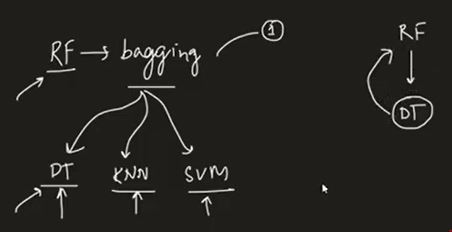

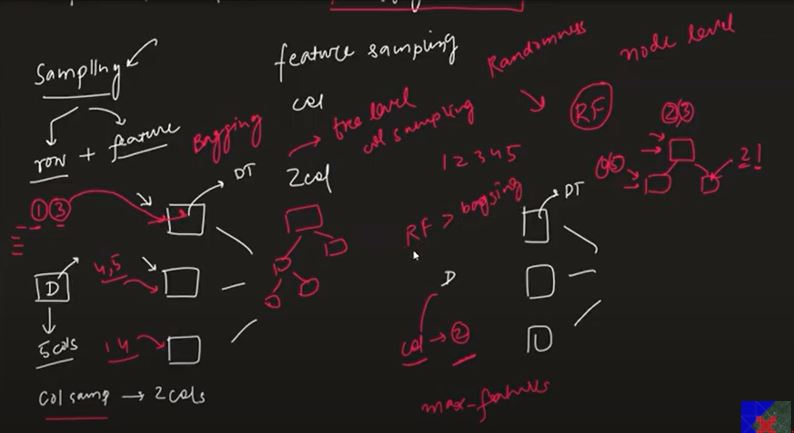

- **Random Forest Classifier:**

 - **Base Learners** only **Decision Tree**

 - **Each node level** column sampling

- **Bagging Classifier:**

 - **Base Learners** is **DT, KNN, SVM etc**

 - **Tree level** column sampling

**Performance of Random Forest > Bagging**

------------------

### **a) Bagging Classifier**

- Since base learners in Bagging classifier can be any model **base_estimator=None**

#### **sklearn.ensemble.BaggingClassifier**

- class sklearn.ensemble.BaggingClassifier(
  
   **base_estimator=None**,
   
   n_estimators=10,
   
   *,
   
   max_samples=1.0,
   
   max_features=1.0,
   
   bootstrap=True,
   
   bootstrap_features=False,
   
   oob_score=False,
   
   warm_start=False,
   
   n_jobs=None,
   
   random_state=None,
   
   verbose=0)

#### **base_estimatorobject, default=None**

- The **base estimator** to fit on random subsets of the dataset.

- If **None**, then the **base estimator** is a **DecisionTreeClassifier**.


In [11]:
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.datasets import make_classification

X, y = make_classification(n_samples=100, n_features=4,
                           n_informative=2, n_redundant=0,
                           random_state=0, shuffle=False)

clf = BaggingClassifier(base_estimator=SVC(),
                        n_estimators=10, random_state=0).fit(X, y)

clf.predict([[0, 0, 0, 0]])

array([1])

---------------------------

### **b) Random Forest Classifier**

- Since base learners in Random Forest classifier is only Decision tree, the option **base_estimator=None** not available. Default Decision tree.

#### **sklearn.ensemble.RandomForestClassifier**

- class sklearn.ensemble.RandomForestClassifier(
  
   n_estimators=100,
   
   *,
   
   criterion='gini',
   
   max_depth=None,
   
   min_samples_split=2,
   
   min_samples_leaf=1,
   
   min_weight_fraction_leaf=0.0,
   
   max_features='auto',
   
   max_leaf_nodes=None,
   
   min_impurity_decrease=0.0,
   
   bootstrap=True,
   
   oob_score=False,
   
   n_jobs=None,
   
   random_state=None,
   
   verbose=0,
   
   warm_start=False,
   
   class_weight=None,
   
   ccp_alpha=0.0,
   
   max_samples=None)


----------------------------

### **c) Random Forest Classifier Vs Bagging Classifier**

In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
from sklearn.ensemble import BaggingClassifier,RandomForestClassifier
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

In [2]:
X,y = make_classification(n_features=5, n_redundant=0, n_informative=5,n_clusters_per_class=1)

In [3]:
df = pd.DataFrame(X,columns=['col1','col2','col3','col4','col5'])
df['target'] = y
print(df.shape)
df.head()

(100, 6)


,col1,col2,col3,col4,col5,target
0,0.592709,2.974436,-1.815604,3.148026,-1.192433,0
1,0.414491,1.465704,-1.734725,1.287121,-1.566558,0
2,1.187427,-1.452962,1.964005,-0.079018,-2.272505,1
3,1.511647,0.252233,0.231412,-0.521814,-1.652231,1
4,1.382899,1.747846,-1.893389,3.847040,-1.377656,0


### **Bagging Classifier**

- since **max_features=2**, observe in below tree throughout it selected **only 2 columns / features X[0] and X[1]**.

In [4]:
bag = BaggingClassifier(max_features=2)

In [5]:
bag.fit(df.iloc[:,:5],df.iloc[:,-1])

BaggingClassifier(base_estimator=None, bootstrap=True, bootstrap_features=False,
                  max_features=2, max_samples=1.0, n_estimators=10, n_jobs=None,
                  oob_score=False, random_state=None, verbose=0,
                  warm_start=False)

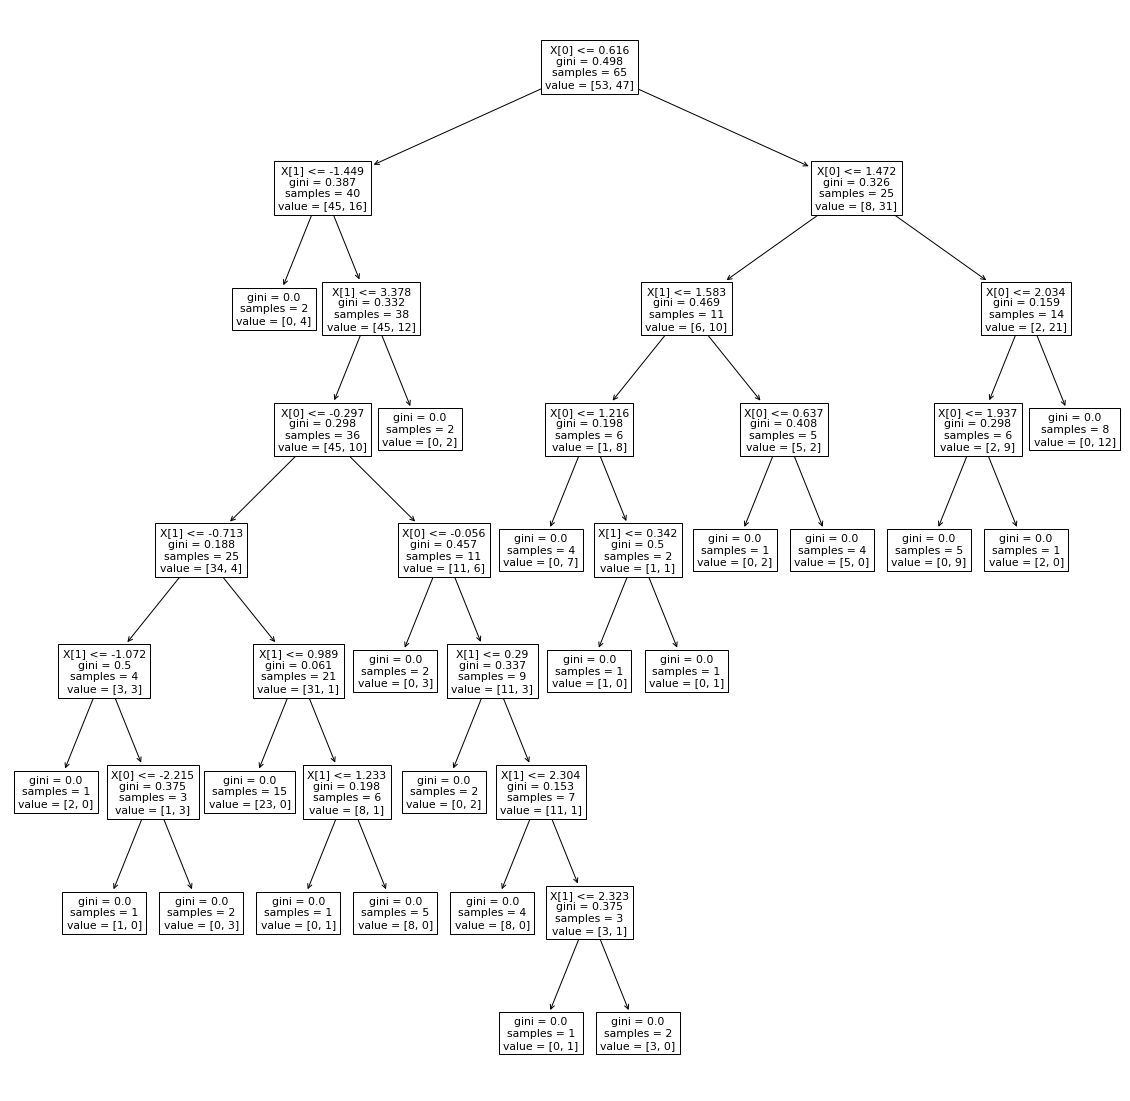

In [7]:
plt.figure(figsize=(20,20))
plot_tree(bag.estimators_[0])
plt.show()

### **Random Forest Classifier**

- max_features=2, since node level column sampling it covered all features.

In [8]:
rf = RandomForestClassifier(max_features=2)

In [9]:
rf.fit(df.iloc[:,:5],df.iloc[:,-1])

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features=2,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

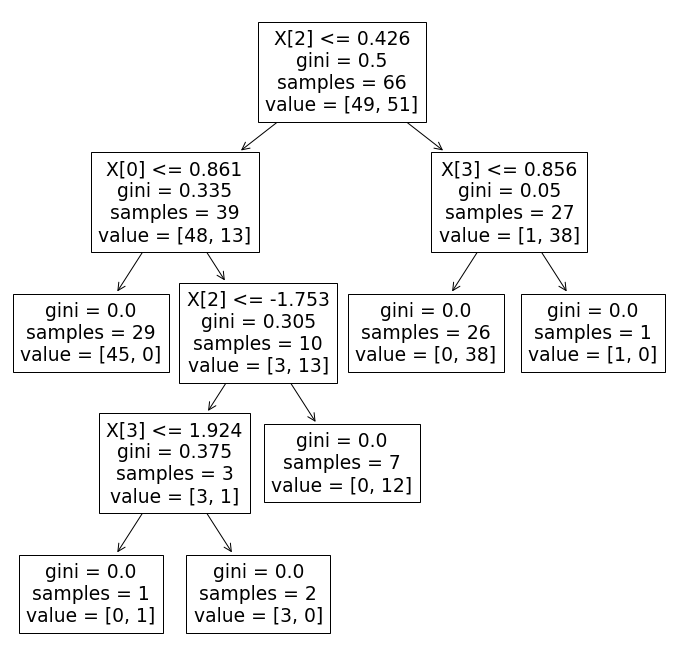

In [10]:
plt.figure(figsize=(12,12))
plot_tree(rf.estimators_[4])
plt.show()

### **Reference**

- https://www.youtube.com/watch?v=l93jRojZMqU ---> Bagging Vs Random Forest